# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов и поучаствовать в соревновании на Kaggle!
Первым делом вам предстоит построить хороший бейзлайн, а дальше пытаться улучшать, соревнуясь с другими участниками.


Ссылка на соревнование: https://www.kaggle.com/c/avito-category-prediction/overview
Данные для домашнего задания можно скачать на странице соревнования.
Чтобы ваше участие было засчитано, убедитесь, что имя в Leaderboard имеет вид: «Имя Фамилия номер_группы».

Оценивание:

Домашнее задание оценивается как обычно. Баллы указаны напротив заданий.

За соревнование даются бонусные баллы следующим образом.
Если вы пересекли baseline_2 на приватном лидерборде, ваша оценка равна 

10 - 10 * (i - 1) / M

где M — количество студентов, принявших участие в соревновании;

i — место (начиная с 1) студента в приватном лидерборде среди всех таких студентов.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* В течение 3 суток после окончания соревнования в соответствующее задание на anytask необходимо прислать код, воспроизводящий ответы для посылки, фигурирующей в приватном лидерборде. В случае отсутствия кода, воспроизводящего результат, в установленный срок студенту выставляется 0 в качестве оценки за соревнование. Если не оговорено иное, использовать любые внешние данные в соревнованиях '''запрещено'''. Под внешними данными понимаются размеченные данные, где разметка имеет прямое отношение к решаемой задаче. Грубо говоря, сборник текстов с википедии не считается внешними данными.


Мы будем работать с датасетом объявлений Avito. Нам предстоит по заголовку и тексту объявления предсказывать категорию объявления.

In [1]:
import pandas as pd

In [2]:
train_ = pd.read_csv('avito-category-prediction/train.csv')
test = pd.read_csv('avito-category-prediction/test.csv')

In [3]:
train_.head()

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


In [4]:
train_.shape

(4234042, 4)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [5]:
train_.isnull().any().any()

True

In [6]:
# отделим категориальные признаки
cat_features_mask = (train_.dtypes == "object").values
# отделим остальные признаки
train_real = train_[train_.columns[~cat_features_mask]]
# заполним пропуски пустыми строками
train_no_nan = train_[train_.columns[cat_features_mask]].fillna("")
train_ = pd.concat([train_no_nan, train_real], axis=1)
train_.head(5)

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


In [7]:
train_.isnull().any().any()

False

## Задание 2 (0.5 балла)
Сконкатенируйте заголовок и описание в единую строку и поместите результат в отдельный столбец. Таким образом мы будет работать с одним текстом, а не с двумя.

In [8]:
train = train_.sample(n=500000, random_state=101)

In [9]:
train['text'] = train['title'] + ' ' + train['description']
train.head()

,title,description,Category_name,Category,text
3458438,Детские часы с GPS Smart Baby Watch Х 10,"Детские часы с GPS Smart Baby Watch Х 10, черн...",Часы и украшения,28,Детские часы с GPS Smart Baby Watch Х 10 Детск...
220455,Сруб бани,Сруб бани 4х4 (в лапу)/\n /\nСтроительная комп...,Ремонт и строительство,19,Сруб бани Сруб бани 4х4 (в лапу)/\n /\nСтроите...
260605,Зимние шапки Kerry,"Зимняя шапка Kerry (50% шерсти), розовый заяц ...",Детская одежда и обувь,29,Зимние шапки Kerry Зимняя шапка Kerry (50% шер...
2201685,Продаю тельфер,продаю,Ремонт и строительство,19,Продаю тельфер продаю
217587,Продаётся смартфон,Продается смартфон Samsung galaxy note8. Росте...,Телефоны,84,Продаётся смартфон Продается смартфон Samsung ...


In [10]:
train = train.reset_index()
train = train.drop(['index'], axis=1)

## Задание 3 (0.5 балла)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Сколько всего уникальных классов необходимо предсказать?
2. Постройте столбчатую диаграмму распределения по классам. Нормализуйте график, чтобы видеть доли, а не абсолютные значения.
3. На сколько большой дисбаланс? Какой класс имеет самую большую долю в выборке (укажите класс и долю), какой класс наименьшую (укажите класс и долю).

Сколько всего категорий надо предсказать:

In [11]:
len(set(train['Category_name'].values))

50

Уберем столбцы, которые нам не пригодятся:

In [12]:
train = train.drop(['title', 'description', 'Category_name'], axis=1)
train

,Category,text
0,28,Детские часы с GPS Smart Baby Watch Х 10 Детск...
1,19,Сруб бани Сруб бани 4х4 (в лапу)/\n /\nСтроите...
2,29,Зимние шапки Kerry Зимняя шапка Kerry (50% шер...
3,19,Продаю тельфер продаю
4,84,Продаётся смартфон Продается смартфон Samsung ...
...,...,...
499995,87,Дистиллятор медный Дистиллятор медный 1 метр и...
499996,27,"Новые ботинки Tommy Hilfiger, 39 размер Новые ..."
499997,29,Кроссовки Adidas оригинал Продам кроссовки на...
499998,21,Плита электрическая зви 417 Требуется ремонт 2...


In [13]:
import numpy as np
import matplotlib.pyplot as plt

Распределение по категориям всей выборки:

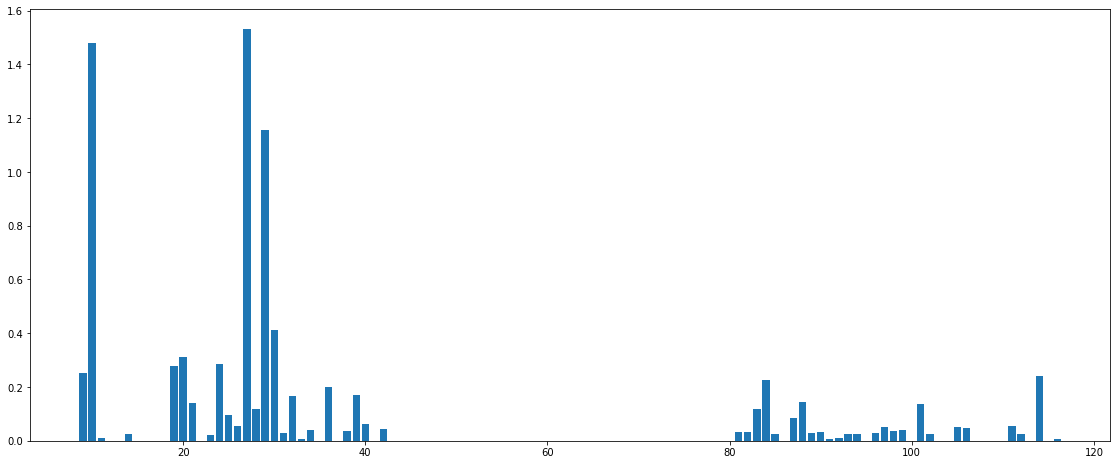

In [14]:
fig = plt.figure(figsize=[15, 6])
ax = fig.add_axes([0,0,1,1])

category = np.array(list(set(train_['Category'].values)))
prop = np.zeros((50,))
shape = train.shape[0]
for i in range(50):
    prop[i] = train_[train_['Category']==category[i]].shape[0] / shape

ax.bar(category, prop)
plt.show()

Распределение по категориям (только для отобранных нами для удобства рандомных 500 000 объектов):

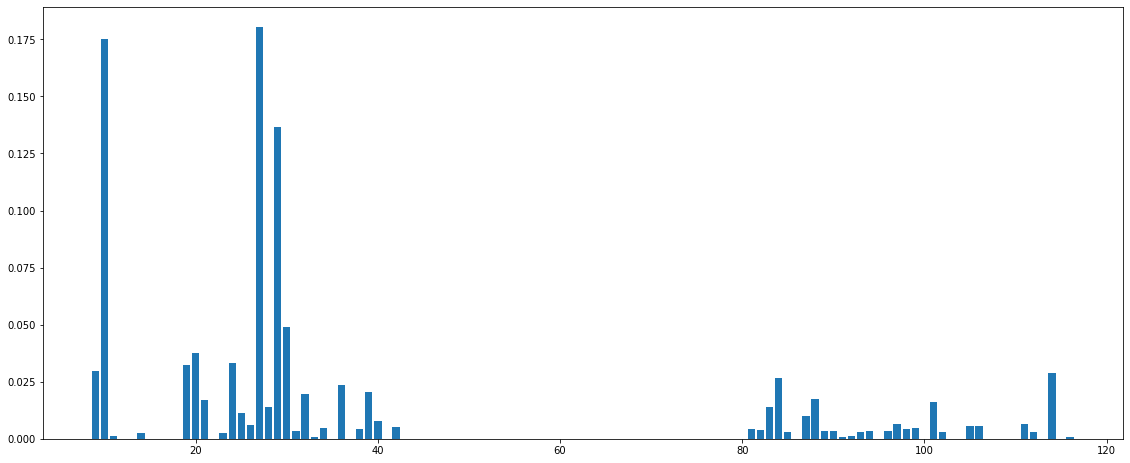

In [15]:
fig = plt.figure(figsize=[15, 6])
ax = fig.add_axes([0,0,1,1])

category = np.array(list(set(train['Category'].values)))
prop = np.zeros((50,))
shape = train.shape[0]
for i in range(50):
    prop[i] = train[train['Category']==category[i]].shape[0] / shape

ax.bar(category, prop)
plt.show()

Распределение получилось одинаковое, а значит, выбранная нами подвыборка репрезентативна. Дальше можно спокойно продолжать работу с ней.

In [16]:
print('Класс с самой большой долей в выборке: ')
print(f'Класс: {category[np.argmax(prop)]}' + '\n' + f'Доля: {np.max(prop)}' + '\n')

print('Класс с наименьшей долей в выборке: ')
print(f'Класс: {category[np.argmin(prop)]}' + '\n' + 'Доля: {:f}'.format(np.min(prop)))

Класс с самой большой долей в выборке: 
Класс: 27
Доля: 0.180254

Класс с наименьшей долей в выборке: 
Класс: 86
Доля: 0.000028


**Дисбаланс:** 

In [18]:
print('Разрыв между наименьшей и наибольей долей: {:f}'.format(np.max(prop) - np.min(prop)))
print(f'Наибольшая доля превышает наименьшую в {np.max(prop) / np.min(prop)} раз')

Разрыв между наименьшей и наибольей долей: 0.180226
Наибольшая доля превышает наименьшую в 6437.642857142857 раз


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью. Для test части нам неизвестны истинные значения, и они понадобятся только тогда, когда мы будем отправлять решение на Kaggle.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

Для выборки размером в 500000:

In [20]:
vectorizer = CountVectorizer()
corpus = list(train['text'].values)
X = vectorizer.fit_transform(corpus)
# features = vectorizer.get_feature_names()

Размер получившейся матрицы: 

In [21]:
print(X.shape)

(500000, 591268)


## Задание 5 (0.5 балла)

В предыдущем пункте у вас должная была получится очень большая матрица. Это не дело.
Если вы взглянете на текст, то увидете, что там есть множество специальных символов.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса.

1. Найдите в этом словаре все слова, которые начинаются на цифру. Сколько таких слов нашлось?

2. Найдите все слова, которые начинаются на символы пунктуации. Сколько таких слов нашлось? 

In [22]:
vocabulary = vectorizer.vocabulary_

# слова, начинающиеся на цифру
starting_num = [el for el in vocabulary if el[0] in '0123456789']
print(f'Слов, начинающихся на цифру: {len(starting_num)}')

# слова, начинающиеся на символы пунктуации
from string import punctuation
starting_punct = [el for el in vocabulary if el[0] in punctuation]
print(f'Слов, начинающихся на символы пунктуации: {len(starting_punct)}')

Слов, начинающихся на цифру: 120370
Слов, начинающихся на символы пунктуации: 444


## Задание 6 (2.5 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью word_tokenizer из пакета nltk
2. Удалит все токены содержащие числа и пунктуацию
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords('russian')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функии на самом первом описании товара в датасете.

Важно: так как функию будет необходимо запускать на большом корпусе, подумайте об эффективной реализации. Постарайтесь решить задачу в минимальное количество циклов и копирований.

Референсная реализация на компьютере автора работала 230 секунд на 100к строчек.

In [23]:
import nltk
import re

In [93]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize

In [90]:
def my_tokenizer(text):
    stemmer = SnowballStemmer('russian')
    text = word_tokenize(text.lower())
    text = [stemmer.stem(el) for el in text if el not in nltk.corpus.stopwords.words('russian')\
           and re.search(r'[^a-z^а-я]', el) is None]
    
    return text

In [94]:
import time
text = train['text'][0]
print(text)
print()
text = my_tokenizer(text)
print(text)

Детские часы с GPS Smart Baby Watch Х 10 Детские часы с GPS Smart Baby Watch Х 10, черные/
 /
 Адрес магазина: пр-т Октября 46. ТЦ «Гигант»(Лотос») 3 эт. С 10-00 до 20-00 Без выходных./
 /
 Ознакомьтесь с полным ассортиментом нашего магазина нажав синюю ссылку «Мир удивительных товаров» в окошках справа ➚➚➚➚➚➚➚➚➚➚ или снизу после объявления. (в МОБ. ВЕРСИИ ССЫЛКА ТОЛЬКО СНИЗУ!)/
 /
!!!ВНИМАНИЕ!!! На последних фото точное местонахождение нашего магазина и схема проезда! /
 /
ஜ════════ஜ۩۞۩ஜ═════════ஜ/
 /
В НАЛИЧИИ МНОГО РАЗНЫХ МОДЕЛЕЙ ДЕТСКИЕ СМАРТ ЧАСЫ С GPS ТРЕКЕРОМ, ВЗРОСЛЫЕ СМАРТ ЧАСЫ, ОГРОМНЫЙ ВЫБОР ПОПУЛЯРНЫХ ИГРУШЕК И МНОГОЕ ДРУГОЕ !/
 /
Детские часы с GPS Smart watch X10 — универсальные смарт часы для детей и взрослых людей. Эти часы также известны под названием Smart watch V7k./
/
Раньше смарт часы строго делились на детские и взрослые. В детских умных часах был обязательно gps трекер, но отсутствовал основной функционал умных часов. А во взрослых было строго наоборот. Умные час

## Задание 7 (1 балл)

1. Возьмите случайные 500к строк из датасета. Постройте по ним CountVectorizer с применением вашего токенизатора.
2. Разбейте полученную матрицу на train, test в отношении 4 к 1. Не забудьте про target переменную.
3. Обучите SGDClassifier на полученной выборке.
4. Посчитайте метрику accuracy

Случайные 500к строк уже были взяты из датасета ранее

In [97]:
train_text = train['text'].values

In [95]:
tokens = np.array([my_tokenizer(el) for el in train_text])

KeyboardInterrupt: 

In [46]:
cv = CountVectorizer(list(train['text']), tokenizer=lambda x: x, lower=False)
X = cv.fit_transform(list(train['text']))

/Users/katyona/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass input=<built-in method all of numpy.ndarray object at 0x166a297c0> as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


KeyboardInterrupt: 

In [32]:
print(count_vector.shape)

(500000, 207455)


In [35]:
count_vector = np.array(count_vector)

In [41]:
train_matrix = np.concatenate((count_vector, np.array(train['Category']).T), axis=1)

ValueError: zero-dimensional arrays cannot be concatenated

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

## Задание 8 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество.
2. Мы можем еще сильнее уменьшите размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(analyzer='word', tokenizer=my_tokenizer)
X = tfidf_vec.fit_transform(np.array(train['text'].values))

KeyboardInterrupt: 

In [101]:
X.shape

(500000, 591268)

## Задание 9 (1 балл)
Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 30000.
2. Какой из трех подходов показал самый высокий результат?

## Задание 10 (1.5 балла)

Пришло время выйти в мир. Отправляйтесь на Kaggle Inclass и сделайте первую посылку. Там вы найдете инструкцию как сформировать файл с предсказаниями и отправить его.